In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)
data2 = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
df = pd.read_csv('Downloads/fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [567]:
table = pd.pivot_table(df,values='manner_of_death',index='race',columns='signs_of_mental_illness',aggfunc='count',fill_value=0)
table

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [569]:
def True_procentage(row):
    procentage = row[True]/(row[False]+row[True])
    return procentage

In [572]:
table['True_procentage'] = table.apply(lambda row: True_procentage(row), axis=1)
table

signs_of_mental_illness,False,True,True_procentage
race,,,
A,69,24,0.258065
B,1114,184,0.141757
H,745,157,0.174058
N,64,14,0.179487
O,37,11,0.229167
W,1763,713,0.287964


In [574]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day_name()
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [576]:
daily_inter = df['day'].value_counts()
daily_inter

day
Wednesday    829
Tuesday      816
Thursday     810
Friday       761
Sunday       753
Monday       726
Saturday     721
Name: count, dtype: int64

In [578]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_inter = daily_inter.reindex(day_order)
daily_inter

day
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64

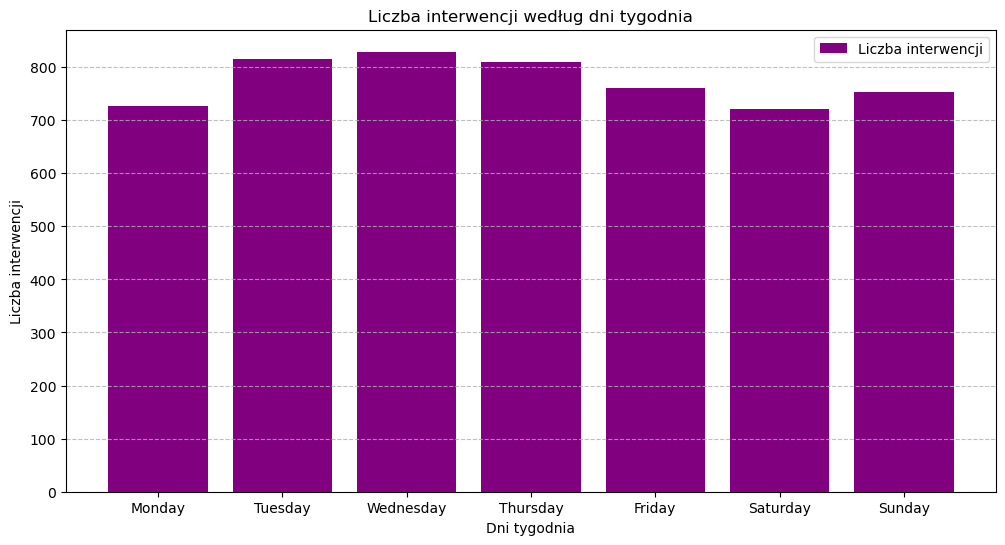

In [580]:
plt.figure(figsize=(12, 6))
plt.bar(daily_inter.index, daily_inter.values, color='purple', label="Liczba interwencji")
plt.xlabel("Dni tygodnia")
plt.ylabel("Liczba interwencji")
plt.title("Liczba interwencji według dni tygodnia")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.8)
plt.show()

In [581]:
df1 = data1[1]
df1

,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,Name,Status of region,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[2]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN
...,...,...,...,...,...,...,...,...,...,...
74,Nebraska,Obsolete postal code[g],NaN,NaN,NaN,NB,NaN,NaN,NaN,NaN
75,Northern Mariana Islands,Obsolete postal code[h],NaN,NaN,NaN,CM,NaN,NaN,NaN,NaN
76,Panama Canal Zone,Obsolete postal code,PZ PCZ 594,NaN,NaN,CZ,NaN,NaN,NaN,NaN
77,Philippine Islands,Obsolete postal code,PH PHL 608[11],NaN,NaN,PI,NaN,NaN,NaN,NaN


In [583]:
df2 = data2[0]
df2

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [586]:
merged_data = pd.merge(df2, df1, left_on='State', right_on='Name', how='inner')
merged_data

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,...,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,...,California,State,US-CA,CA,6.0,CA,CF,Calif.,Calif.,Cal.
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,...,Texas,State,US-TX,TX,48.0,TX,TX,Tex.,Texas,NaN
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,...,Florida,State,US-FL,FL,12.0,FL,FL,Fla.,Fla.,NaN
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,...,New York,State,US-NY,NY,36.0,NY,NY,N.Y.,N.Y.,N. York[3]
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,...,Pennsylvania,State (officially Commonwealth),US-PA,PA,42.0,PA,PA,Pa.,Pa.,"Penn.,[2] Penna.[5]"
5,6,5,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,...,Illinois,State,US-IL,IL,17.0,IL,IL,Ill.,Ill.,NaN
6,7,7,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,...,Ohio,State,US-OH,OH,39.0,OH,OH,Ohio,Ohio,"O.,[4] Oh.[2]"
7,8,9,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,...,Georgia,State,US-GA,GA,13.0,GA,GA,Ga.,Ga.,Geo.[2]
8,9,10,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,...,North Carolina,State,US-NC,NC,37.0,NC,NC,N.C.,N.C.,N. Car.
9,10,8,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,...,Michigan,State,US-MI,MI,26.0,MI,MC,Mich.,Mich.,NaN


In [588]:
final_data = pd.merge(merged_data, df, left_on='USPS', right_on='state', how='inner')

In [590]:
final_data.drop(['Rank in states & territories, 2020', 'Rank in states & territories, 2010', 'Census population, April 1, 2010 [1][2]', 'Percent of the total U.S. population, 2020 [note 3]', 'Percent change, 2010–2020 [note 1]', 'Absolute change, 2010-2020', 'Total seats in the U.S. House of Representatives, 2023–2033', 'Census population per electoral vote [note 2]', 'Census population per House seat', 'Name','Status of region', 'ISO', 'ANSI', 'ANSI.1', 'USCG', 'GPO', 'AP', 'Other abbreviations'],axis=1, inplace = True)

In [592]:
final_data.rename(columns = {'Census population, April 1, 2020 [1][2]' : 'Population'}, inplace = True)

In [594]:
final_data

,State,Population,USPS,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day
0,California,39538223,CA,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
1,California,39538223,CA,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,False,attack,Not fleeing,False,Tuesday
2,California,39538223,CA,43,Brian Barbosa,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False,Sunday
3,California,39538223,CA,63,Jose Ceja,2015-01-15,shot,knife,36.0,M,H,Fairfield,CA,True,other,Not fleeing,False,Thursday
4,California,39538223,CA,68,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,O,Fremont,CA,False,other,Not fleeing,False,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,Wyoming,576851,WY,3444,Douglas Oneyear,2018-02-25,shot,sword,36.0,M,W,Casper,WY,False,other,Foot,False,Sunday
5412,Wyoming,576851,WY,3673,David P. Wolosin,2018-05-06,shot,gun,38.0,M,W,Casper,WY,False,attack,Not fleeing,False,Sunday
5413,Wyoming,576851,WY,3976,William T. McCollum,2018-07-10,shot,gun,21.0,M,W,Casper,WY,True,other,Car,False,Tuesday
5414,Wyoming,576851,WY,4229,Robbie Ramirez,2018-11-04,shot,unarmed,39.0,M,H,Laramie,WY,True,undetermined,Foot,False,Sunday


In [596]:
total_inc = final_data['State'].value_counts()
marge_total_inc = pd.merge(df2['State'], total_inc, left_on = 'State', right_on = 'State', how = 'inner')
marge_total_inc

,State,count
0,California,799
1,Texas,481
2,Florida,350
3,New York,101
4,Pennsylvania,108
5,Illinois,104
6,Ohio,155
7,Georgia,182
8,North Carolina,156
9,Michigan,78


In [598]:
zmn = df2[['State', 'Census population, April 1, 2020 [1][2]']]
zmn.columns = ['State', 'Population']

In [600]:
marge_total_inc = pd.merge(marge_total_inc, zmn, on = 'State', how = 'outer')
marge_total_inc = marge_total_inc.fillna(0)

In [602]:
def per_1000(row):
    x = row['count']/row['Population']*1000*100
    x = round(x, 2)
    return f'{x}%'

In [604]:
marge_total_inc['incident_per_1000'] = marge_total_inc.apply(lambda row: per_1000(row), axis=1)

In [606]:
marge_total_inc

,State,count,Population,incident_per_1000
0,Alabama,104.0,5024279,2.07%
1,Alaska,39.0,733391,5.32%
2,American Samoa,0.0,49710,0.0%
3,Arizona,254.0,7151502,3.55%
4,Arkansas,83.0,3011524,2.76%
5,California,799.0,39538223,2.02%
6,Colorado,195.0,5773714,3.38%
7,Connecticut,21.0,3605944,0.58%
8,Contiguous United States,0.0,329260619,0.0%
9,Delaware,13.0,989948,1.31%
